# Visualizing hierarchies

## visualizations communicate insights
- t-SNE : creates a 2D map of a dataset

A hierarchy of groups
- groups of living things can form a hierarchy
- culters are contained in one another

### Hierarchical clustering
- every country begins in a separate cluster
- at each step, the two closest clusters are merged
- continue until all countries in a single cluster
- this is "agglomerative" hierarchical clustering
- 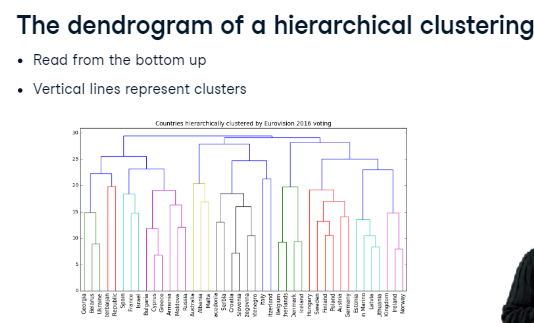

### hierarchical clustering with SciPy
given samples(the array of scores) and country_names
```python
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(sample, method='complete')
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,
leaf_font_size=6)
plt.show()
```

## cluster labels in hierarchical clustering
- not only a visualization tool!
- cluster labels at any intermediate stage can be recovered
- for use in e.g. cross-tabulations
### dendograms show cluster distances
- height on dendrogram = distance between merging clusters
- height on dendrogram specifies max distance between merging clusters
- dont merge clusters further apart than this
### distance between clusters
- defined by a "linkage method"
- in "complete" linkage: distance between clusters is max. distance between their samples
- specified via methid parameter, eg linkage(samples, method="complete"
- different linkage method, different hierarchical clustering
### extracting cluster labels
- use the fcluster() function
- returns a NumPy array of cluster labels

```python
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method="complete")
from scipy.cluster.hierarchy import fcluster
labels=fcluster(mergings, 15, criterion='distance')
print(labels)
```
### aligning cluster labels with country names
```python
import pandas as pd
pairs=pd.DataFrame({'labels':labels, 'countries':country_names})
print(pairs.sort_values('labels'))

## t-SNE for 2-dimensional maps
t-SNE = t-distributed stochastic neighbor embedding
- maps smaples to 2D scape (or3D)
- map approximately preserves nearness of samples
- great for inspecting datasets

t-SNE in sklearn
```python
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100)
transformed=model.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
plt.show()
```
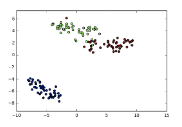

t-SNE has only fit_transform()
-  simultaneously fits the model and transforms the data
-  has no separate fit() or transform() methods
-  cant extend the map to include new data samples
-  must start over each time!
-  learning rate
   - choose learning rate for the dataset
   - wrong choice: points bunch together
   - try vales between 50 and 200
- different every time
  - 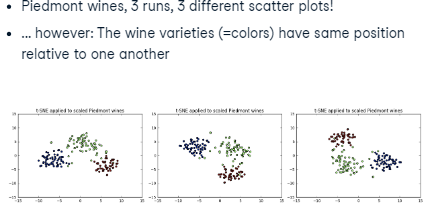